In [13]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler 
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import Pipeline
from scipy.stats import sem
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.ensemble import RandomForestClassifier



from sklearn.metrics import classification_report, recall_score, precision_score, make_scorer

%matplotlib inline

url_df = 'https://raw.githubusercontent.com/AngelaBurgaleta/TFM_NHANES/main/DATASETS%20DEFINITIVOS/PROCESSED/df_procesado_genderandage.csv'
url_df45_sinoutliers = 'https://raw.githubusercontent.com/AngelaBurgaleta/TFM_NHANES/main/DATASETS%20DEFINITIVOS/PROCESSED/Sin_outliers/df_v45sinoutliers.csv'
df = pd.read_csv(url_df45_sinoutliers)
df = df.drop(['Unnamed: 0'], axis = 1)


In [14]:
y = df['MET_SYM']
vars_descarte = ['REQ1', 'REQ2', 'REQ3', 'REQ4', 'REQ5', 'REQ_SUM', 'MET_SYM', 'BPXSY1', 'BPXDI1', 'BMXWAIST', 'LBXTR', 'BPQ090D', 'LBDHDD', 'BPQ040A', 'LBXGLU', 'DIQ070', 'BMXHT', 'BMXWT', 'SEQN', 'DPQ050', 'MCQ010', 'DBQ700', 'ALQ130', 'ALQ130_Tramos', 'PAQ665', 'PAQ620', 'PAQ605', 'BPQ050A']
X = df.drop(vars_descarte, axis = 1)


In [15]:
vars_descarte_ms = ['REQ1', 'REQ2', 'REQ3', 'REQ4', 'REQ5', 'REQ_SUM', 'BPXSY1', 'BPXDI1', 'BMXWAIST', 'LBXTR', 'BPQ090D', 'LBDHDD', 'BPQ040A', 'LBXGLU', 'DIQ070', 'BMXHT', 'BMXWT', 'SEQN', 'DPQ050', 'MCQ010', 'DBQ700', 'ALQ130', 'ALQ130_Tramos', 'PAQ665', 'PAQ620', 'PAQ605', 'BPQ050A']
df_ms = df.drop(vars_descarte_ms, axis = 1)

In [ ]:
X.shape

(26865, 31)

In [16]:
#SIN PCA
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [17]:
#CON PCA
#Normalización
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(X)
# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']
#Aplicar PCA 
#fijamos componentes
pca = PCA(n_components=26)
X_pca = pca.fit_transform(X)
X_pca.shape
#Separar datos en train, test, entrada y salida despues del PCA
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=30)

#Random forest default sin PCA

https://www.kaggle.com/code/prashant111/random-forest-classifier-feature-importance/notebook

In [ ]:
#10 arboles de decision
# import Random Forest classifier




# instantiate the classifier 

rfc = RandomForestClassifier(random_state=0)



# fit the model

rfc.fit(X_train, y_train)



# Predict the Test set results

y_pred = rfc.predict(X_test)



# Check accuracy score 

from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.8762


In [ ]:
# instantiate the classifier with n_estimators = 100

rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)



# fit the model to the training set

rfc_100.fit(X_train_pca, y_train)



# Predict on the test set results

y_pred_100 = rfc_100.predict(X_test_pca)



# Check accuracy score 

print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 100 decision-trees : 0.8653


In [ ]:
# create the classifier with n_estimators = 100

clf = RandomForestClassifier(n_estimators=100, random_state=0)



# fit the model to the training set

clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
# view the feature scores

feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

RIDAGEYR           0.154020
BPQ030             0.129836
LBXIN              0.112415
WHI                0.111396
RIDAGEYR_Tramos    0.095490
BMXBMI             0.081498
INDFMMPI           0.041595
DIQ010             0.032298
RIAGENDR           0.026672
DMDEDUC2           0.021149
HSD010             0.020262
MCQ080             0.017623
RIDRETH3           0.014828
DPQ040             0.013059
DPQ030             0.011906
SMQ020             0.011242
MCQ300C            0.010726
INQ020             0.010686
INDFMMPC           0.010532
PAQ650             0.009691
DPQ020             0.008719
PAQ635             0.008198
SLQ050             0.008032
HIQ011             0.006890
Etnia_3.0          0.006219
Etnia_4.0          0.005788
MCQ220             0.005140
Etnia_2.0          0.004050
Etnia_1.0          0.003966
Etnia_6.0          0.003904
Etnia_7.0          0.002169
dtype: float64

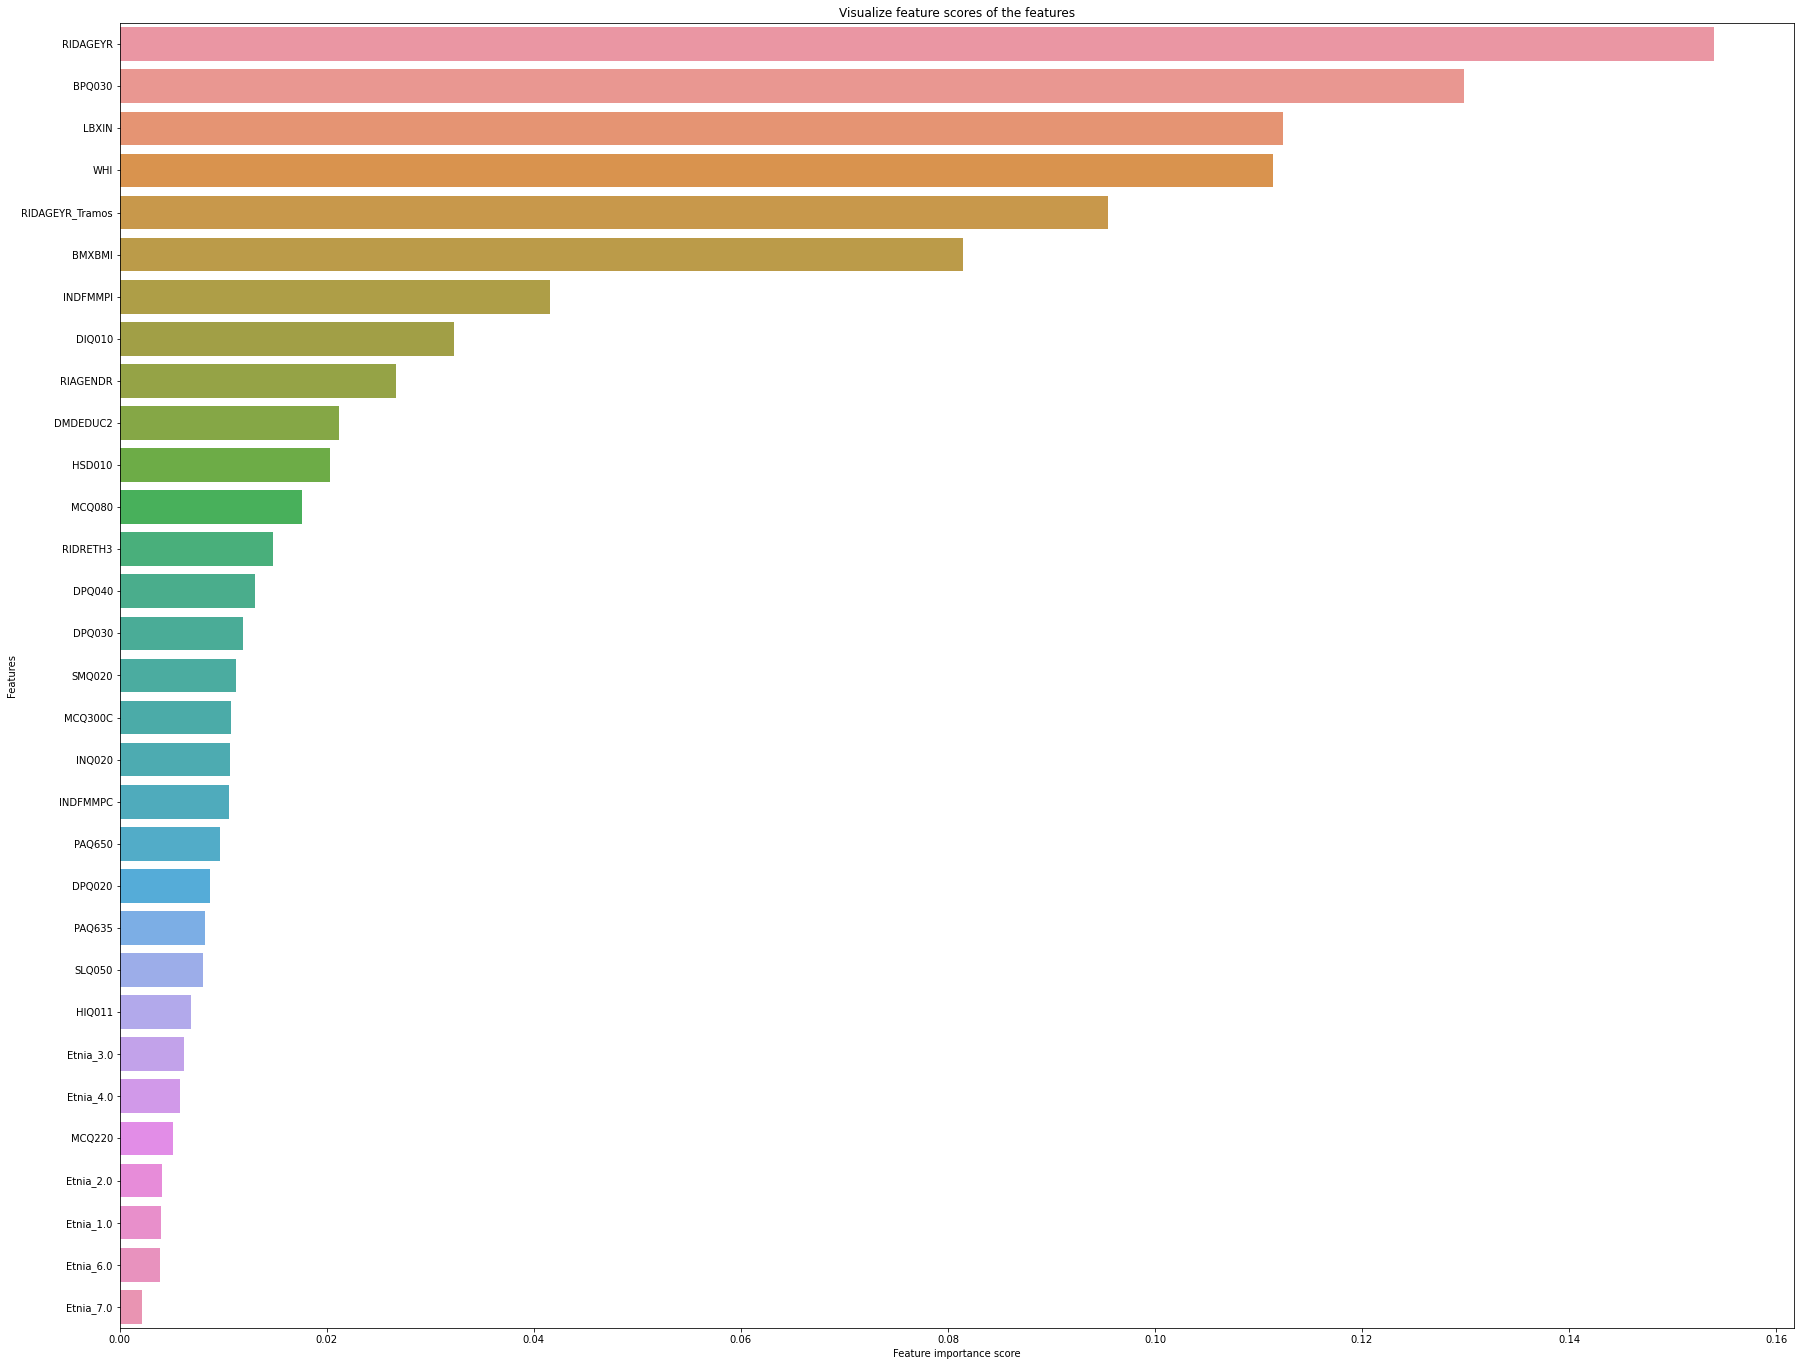

In [ ]:
# Creating a seaborn bar plot

f, ax = plt.subplots(figsize=(30, 24))
ax = sns.barplot(x=feature_scores, y=feature_scores.index)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

##Grid Search

In [ ]:
param_grid = {'max_depth': np.arange(3, 10)} 

gs = GridSearchCV(RandomForestClassifier(), param_grid)

gs.fit(X_train_pca, y_train)

# summarize the results of the grid search
print("Best score: ", gs.best_score_)
print("Best params: ", gs.best_params_)

In [ ]:
# We print the score for each value of max_depth
for i, max_depth in enumerate(gs.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (gs.cv_results_['mean_test_score'][i],
                                        gs.cv_results_['std_test_score'][i] * 2,
                                        max_depth))

0.836 (+/-0.009) for {'max_depth': 3}
0.844 (+/-0.006) for {'max_depth': 4}
0.846 (+/-0.007) for {'max_depth': 5}
0.853 (+/-0.011) for {'max_depth': 6}
0.857 (+/-0.005) for {'max_depth': 7}
0.860 (+/-0.006) for {'max_depth': 8}
0.863 (+/-0.005) for {'max_depth': 9}


In [22]:
# create a composite estimator made by a pipeline of preprocessing and the RandomForest
model = Pipeline([
        ('scaler', StandardScaler()),
        ('DecisionTree', RandomForestClassifier())
])

# create a k-fold cross validation iterator of k=10 folds
cv = KFold(10, shuffle=True, random_state=33)

# by default the score used is the one returned by score method of the estimator (accuracy)
scores = cross_val_score(model, X, y, cv=cv)
print(scores)

[0.86453294 0.87755862 0.86751023 0.86899888 0.85671753 0.85815339
 0.8641102  0.87453462 0.86783321 0.85889799]


In [23]:
model.get_params().keys()


dict_keys(['memory', 'steps', 'verbose', 'scaler', 'DecisionTree', 'scaler__copy', 'scaler__with_mean', 'scaler__with_std', 'DecisionTree__bootstrap', 'DecisionTree__ccp_alpha', 'DecisionTree__class_weight', 'DecisionTree__criterion', 'DecisionTree__max_depth', 'DecisionTree__max_features', 'DecisionTree__max_leaf_nodes', 'DecisionTree__max_samples', 'DecisionTree__min_impurity_decrease', 'DecisionTree__min_samples_leaf', 'DecisionTree__min_samples_split', 'DecisionTree__min_weight_fraction_leaf', 'DecisionTree__n_estimators', 'DecisionTree__n_jobs', 'DecisionTree__oob_score', 'DecisionTree__random_state', 'DecisionTree__verbose', 'DecisionTree__warm_start'])

In [24]:
# Set the parameters by cross-validation
#LLEVA TIEMPO

from sklearn.metrics import classification_report, recall_score, precision_score, make_scorer

# set of parameters to test
tuned_parameters = [{'max_depth': np.arange(8, 10),
   #                  'max_weights': [1, 10, 100, 1000]},
                     'criterion':['gini', 'entropy'], 
                     'min_samples_split': range(2, 18, 2),
                     'min_samples_leaf': [2, 5, 10],
                
                    }]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    if score == 'precision':
        scorer = make_scorer(precision_score, average='weighted', zero_division=0)
    elif score == 'recall':
        scorer = make_scorer(recall_score, average='weighted', zero_division=0)
    
    # cv = the fold of the cross-validation cv, defaulted to 5
    gs = GridSearchCV(RandomForestClassifier(), tuned_parameters, cv=10, scoring=scorer)
    gs.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(gs.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = gs.cv_results_['mean_test_score']
    stds = gs.cv_results_['std_test_score']

    for mean_score, std_score, params in zip(means, stds, gs.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r" % (mean_score, std_score * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, gs.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 10, 'min_samples_split': 14}

Grid scores on development set:

0.862 (+/-0.011) for {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 2}
0.861 (+/-0.012) for {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 4}
0.860 (+/-0.009) for {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 6}
0.861 (+/-0.011) for {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 8}
0.861 (+/-0.011) for {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 10}
0.861 (+/-0.011) for {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 12}
0.860 (+/-0.010) for {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 14}
0.860 (+/-0.011) for {'criterion': 'gini', 

In [ ]:
'''
# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 2, 'min_samples_split': 6}

Grid scores on development set:

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

           0       0.89      0.87      0.88      3215
           1       0.82      0.84      0.83      2158

    accuracy                           0.86      5373
   macro avg       0.85      0.86      0.86      5373
weighted avg       0.86      0.86      0.86      5373


'''

##Random Forest con parametros ajustados sin PCA

In [25]:
#Modelo tras ajuste de parámetros
max_depth = 9
min_samples_split = 6
min_samples_leaf = 2
criterion = 'gini'
random_state = 1

# Create random forest
model = tree.DecisionTreeClassifier(max_depth=max_depth, random_state=random_state, min_samples_split = min_samples_split, criterion = criterion, min_samples_leaf = min_samples_leaf)

# Train the model using the training sets
model.fit(X_train, y_train) 

DecisionTreeClassifier(max_depth=9, min_samples_leaf=2, min_samples_split=6,
                       random_state=1)

In [26]:
# Evaluate Accuracy in training

from sklearn import metrics
y_train_pred = model.predict(X_train)
print("Accuracy in training", metrics.accuracy_score(y_train, y_train_pred))

Accuracy in training 0.8867950865438302


##roc curve de random forest sin PCA con parámetros ajustados

roc_auc_score for DecisionTree:  0.9176579028159535


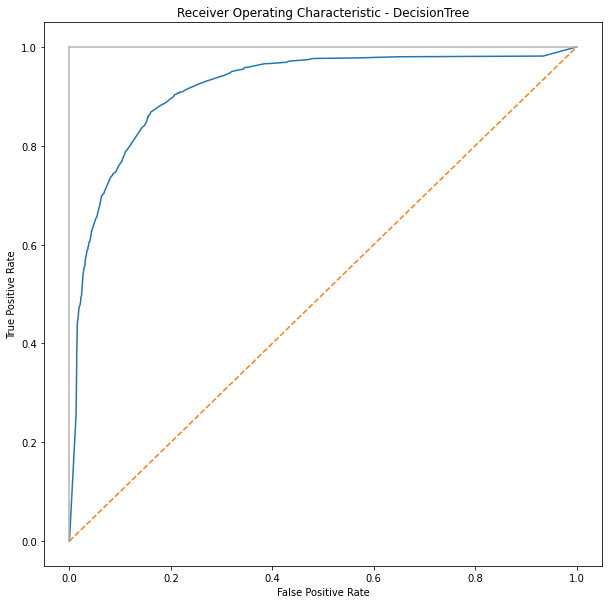

In [28]:
from sklearn.metrics import roc_curve, roc_auc_score
clf_tree = model

y_score1 = clf_tree.predict_proba(X_test)[:,1]

false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)

print('roc_auc_score for DecisionTree: ', roc_auc_score(y_test, y_score1))

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - DecisionTree')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
